# Data Review

The databases are the 2020-2022 The World Covid19 Analysis (Missing some Countries )

In [42]:
pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=14b18feeee95fcbe8280a139db458824ee8f388986c7ae712b7d64e6fd085b5f
  Stored in directory: c:\users\tuzil\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('fivethirtyeight')
from functools import reduce
from pandasql import sqldf


%matplotlib inline


In [44]:
CovidDeaths = pd.read_excel('C:/Users/tuzil/Desktop/All Projects/Project_Covid_19/CovidDeaths.xlsx')

In [45]:
CovidDeaths.head(5)

,,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,39835428,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,39835428,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,39835428,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,39835428,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,39835428,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [46]:
CovidVaccinations = pd.read_excel('C:/Users/tuzil/Desktop/All Projects/Project_Covid_19/CovidVaccinations.xlsx')

In [47]:
CovidVaccinations.head(5)

,,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [48]:
CovidDeaths.info()
CovidDeaths.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0                                               65535 non-null  object        
 1   continent                                   61784 non-null  object        
 2   location                                    65535 non-null  object        
 3   date                                        65535 non-null  datetime64[ns]
 4   population                                  65535 non-null  int64         
 5   total_cases                                 64942 non-null  float64       
 6   new_cases                                   64932 non-null  float64       
 7   new_cases_smoothed                          64467 non-null  float64       
 8   total_deaths                                58489 non-null  float64       
 9   new_de

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.553500e+04,6.494200e+04,6.493200e+04,6.446700e+04,5.848900e+04,58568.000000,58513.000000,64942.000000,64932.000000,64467.000000,...,38681.000000,38077.000000,28166.000000,47833.000000,61403.000000,52749.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,1.308337e+08,2.124519e+06,1.085173e+04,1.074337e+04,4.526541e+04,136.799959,136.208962,28048.157842,171.026889,168.349634,...,11.060249,31.348796,47.401185,2.884029,73.106127,0.712724,18625.226887,8.246724,15.034362,823.795587
std,5.544698e+08,1.127801e+07,7.973209e+04,7.706243e+04,1.969071e+05,616.826887,596.011246,48038.091190,754.327160,567.557743,...,11.517763,13.830852,33.257790,2.205109,7.804200,0.153565,52076.570589,14.705593,29.054247,1326.370720
min,3.528000e+03,1.000000e+00,-2.685600e+04,-5.250000e+02,1.000000e+00,-1584.000000,-24.571000,0.001000,-1041.406000,-33.922000,...,0.200000,7.700000,2.735000,0.300000,53.280000,0.397000,-17779.200000,-28.450000,-53.120000,-1826.595723
25%,7.903290e+05,2.014000e+03,0.000000e+00,6.286000e+00,6.800000e+01,0.000000,0.143000,803.910500,0.000000,2.129000,...,1.700000,18.800000,16.603000,1.300000,66.600000,0.581000,-91.675000,-1.125000,-0.705000,-47.444472
50%,5.813302e+06,1.873500e+04,5.400000e+01,7.785700e+01,4.780000e+02,1.000000,1.714000,4368.252000,10.192000,18.890000,...,5.700000,31.200000,41.047000,2.110000,75.050000,0.748000,3636.200000,3.995000,6.725000,379.743820
75%,2.578822e+07,2.086078e+05,7.780000e+02,8.155000e+02,5.899000e+03,16.000000,16.857000,37292.214500,100.670000,122.353000,...,19.300000,42.500000,83.241000,4.200000,79.070000,0.838000,18973.725000,13.475000,21.547500,1366.087429
max,4.678445e+09,2.202955e+08,2.976388e+06,2.322272e+06,2.139586e+06,10961.000000,8307.143000,592522.374000,51427.491000,16052.608000,...,35.300000,55.500000,97.164000,11.000000,83.920000,0.947000,732186.500000,69.680000,374.600000,8626.892312


In [49]:
CovidVaccinations.info()
CovidVaccinations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0                                               65535 non-null  object        
 1   continent                                   61784 non-null  object        
 2   location                                    65535 non-null  object        
 3   date                                        65535 non-null  datetime64[ns]
 4   new_tests                                   21839 non-null  float64       
 5   total_tests                                 22710 non-null  float64       
 6   total_tests_per_thousand                    22710 non-null  float64       
 7   new_tests_per_thousand                      21839 non-null  float64       
 8   new_tests_smoothed                          28974 non-null  float64       
 9   new_te

,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.183900e+04,2.271000e+04,22710.000000,21839.000000,2.897400e+04,28974.000000,26260.000000,26161.000000,1.642800e+04,1.558700e+04,...,38681.000000,38077.000000,28166.000000,47833.000000,61403.000000,52749.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,4.321836e+04,9.618377e+06,904.141999,4.359997,4.079208e+04,3.816364,0.104001,378.326654,1.732396e+08,7.729263e+07,...,11.060249,31.348796,47.401185,2.884029,73.106127,0.712724,18625.226887,8.246724,15.034362,823.795587
std,1.186759e+05,2.212161e+07,2347.712913,12.381030,1.093502e+05,10.312495,0.112434,7232.343019,6.685733e+08,3.290599e+08,...,11.517763,13.830852,33.257790,2.205109,7.804200,0.153565,52076.570589,14.705593,29.054247,1326.370720
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,...,0.200000,7.700000,2.735000,0.300000,53.280000,0.397000,-17779.200000,-28.450000,-53.120000,-1826.595723
25%,2.439000e+03,3.733405e+05,34.412750,0.242000,2.234000e+03,0.268000,0.021000,6.600000,3.801292e+05,2.608355e+05,...,1.700000,18.800000,16.603000,1.300000,66.600000,0.581000,-91.675000,-1.125000,-0.705000,-47.444472
50%,7.813000e+03,1.526768e+06,185.036500,0.984000,6.477500e+03,1.048000,0.065000,15.300000,4.200478e+06,2.785172e+06,...,5.700000,31.200000,41.047000,2.110000,75.050000,0.748000,3636.200000,3.995000,6.725000,379.743820
75%,3.847550e+04,7.621280e+06,691.567250,3.043000,3.431700e+04,2.782000,0.151500,46.900000,2.927567e+07,1.430638e+07,...,19.300000,42.500000,83.241000,4.200000,79.070000,0.838000,18973.725000,13.475000,21.547500,1366.087429
max,2.945871e+06,2.416085e+08,26904.152000,384.260000,1.627907e+06,147.603000,0.966600,422065.600000,7.092806e+09,3.344875e+09,...,35.300000,55.500000,97.164000,11.000000,83.920000,0.947000,732186.500000,69.680000,374.600000,8626.892312


In [50]:
CovidVaccinations.isnull().sum().sort_values(ascending = False)

excess_mortality_cumulative_per_million       63389
excess_mortality                              63389
excess_mortality_cumulative                   63389
excess_mortality_cumulative_absolute          63389
total_boosters                                59415
total_boosters_per_hundred                    59415
new_vaccinations                              52272
people_fully_vaccinated                       50903
people_fully_vaccinated_per_hundred           50903
people_vaccinated                             49948
people_vaccinated_per_hundred                 49948
total_vaccinations_per_hundred                49107
total_vaccinations                            49107
new_tests                                     43696
new_tests_per_thousand                        43696
total_tests                                   42825
total_tests_per_thousand                      42825
tests_per_case                                39374
positive_rate                                 39275
handwashing_

In [51]:
CovidDeaths.isnull().sum().sort_values(ascending = False)

excess_mortality_cumulative_per_million    63389
excess_mortality                           63389
excess_mortality_cumulative                63389
excess_mortality_cumulative_absolute       63389
weekly_icu_admissions_per_million          62994
                                           ...  
total_cases                                  593
population                                     0
date                                           0
location                                       0
                                               0
Length: 67, dtype: int64

# Data Cleaning

In [52]:
CovidDeaths_copy = CovidDeaths.copy()
CovidVaccinations_copy = CovidVaccinations.copy()

In [53]:
CovidDeaths_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0                                               65535 non-null  object        
 1   continent                                   61784 non-null  object        
 2   location                                    65535 non-null  object        
 3   date                                        65535 non-null  datetime64[ns]
 4   population                                  65535 non-null  int64         
 5   total_cases                                 64942 non-null  float64       
 6   new_cases                                   64932 non-null  float64       
 7   new_cases_smoothed                          64467 non-null  float64       
 8   total_deaths                                58489 non-null  float64       
 9   new_de

In [54]:
CovidDeaths_copy.isnull().sum().sort_values(ascending = False)

excess_mortality_cumulative_per_million    63389
excess_mortality                           63389
excess_mortality_cumulative                63389
excess_mortality_cumulative_absolute       63389
weekly_icu_admissions_per_million          62994
                                           ...  
total_cases                                  593
population                                     0
date                                           0
location                                       0
                                               0
Length: 67, dtype: int64

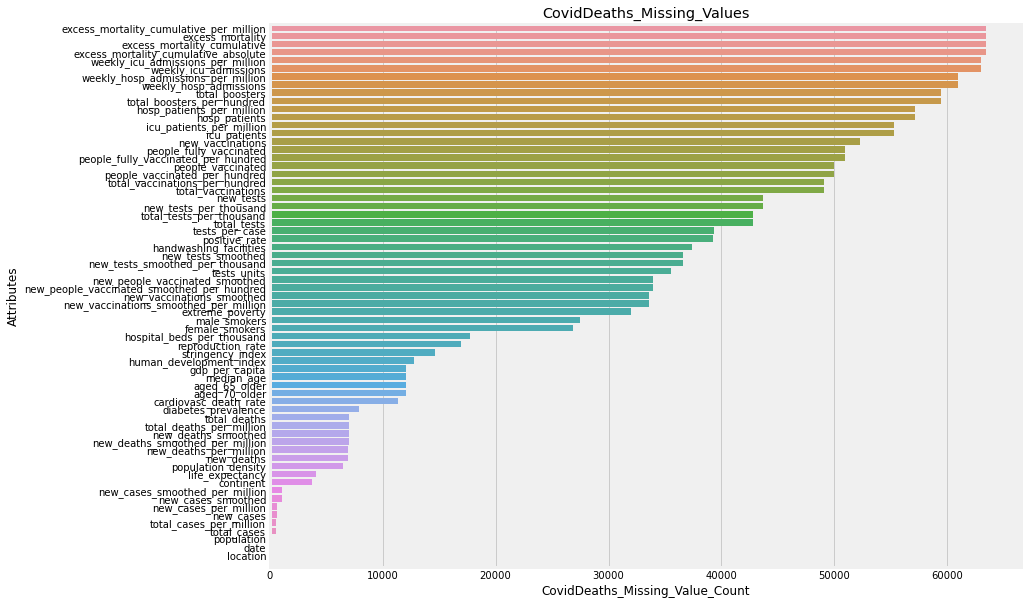

In [55]:
plt.figure(figsize=(12,10))
sns.barplot(data=CovidDeaths_copy.isnull().sum().sort_values(ascending = False).reset_index(), y='index',x=0)
plt.ylabel('Attributes')
plt.title('CovidDeaths_Missing_Values')
plt.xlabel('CovidDeaths_Missing_Value_Count')
plt.show()

In [56]:
CovidDeaths_copy.drop(['excess_mortality_cumulative_per_million','excess_mortality','excess_mortality_cumulative','excess_mortality_cumulative_absolute','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million'], axis = 1)

,,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,39835428,5.0,5.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,39835428,5.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,39835428,5.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,39835428,5.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,39835428,5.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,HND,North America,Honduras,2021-10-31,10062994,375381.0,0.0,176.143,10239.0,0.0,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634
65531,HND,North America,Honduras,2021-11-01,10062994,375381.0,0.0,176.143,10239.0,0.0,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634
65532,HND,North America,Honduras,2021-11-02,10062994,375877.0,496.0,156.286,10273.0,34.0,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634
65533,HND,North America,Honduras,2021-11-03,10062994,375983.0,106.0,171.429,10284.0,11.0,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634


In [57]:
# Show the CovidVaccinations' null value
CovidVaccinations_copy.isnull().sum().sort_values(ascending = False)

excess_mortality_cumulative_per_million       63389
excess_mortality                              63389
excess_mortality_cumulative                   63389
excess_mortality_cumulative_absolute          63389
total_boosters                                59415
total_boosters_per_hundred                    59415
new_vaccinations                              52272
people_fully_vaccinated                       50903
people_fully_vaccinated_per_hundred           50903
people_vaccinated                             49948
people_vaccinated_per_hundred                 49948
total_vaccinations_per_hundred                49107
total_vaccinations                            49107
new_tests                                     43696
new_tests_per_thousand                        43696
total_tests                                   42825
total_tests_per_thousand                      42825
tests_per_case                                39374
positive_rate                                 39275
handwashing_

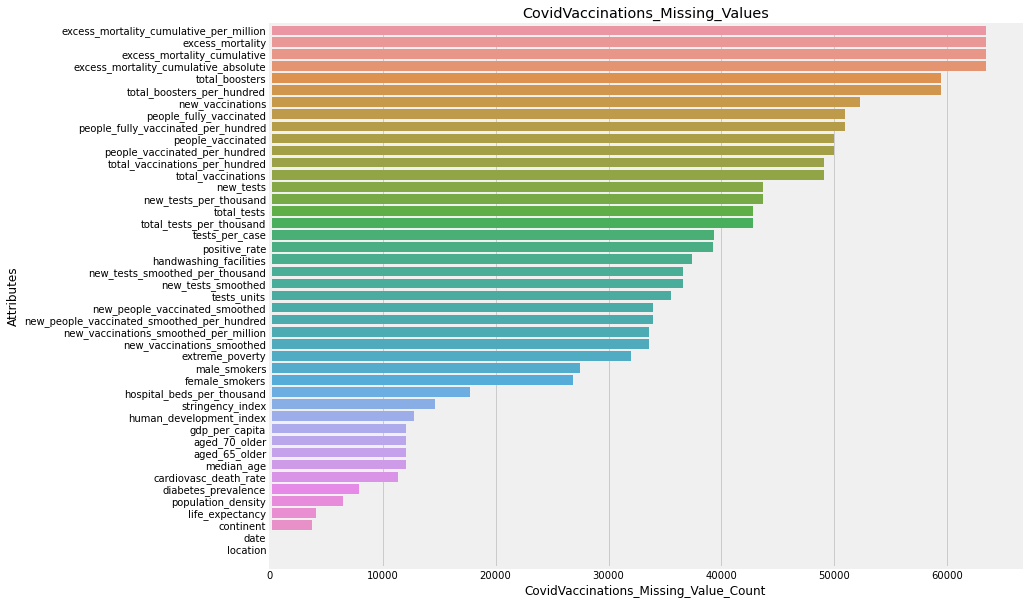

In [225]:
# Plot the null value

plt.figure(figsize=(12,10))
sns.barplot(data=CovidVaccinations_copy.isnull().sum().sort_values(ascending = False).reset_index(), y='index',x=0)
plt.ylabel('Attributes')
plt.title('CovidVaccinations_Missing_Values')
plt.xlabel('CovidVaccinations_Missing_Value_Count')
plt.show()

In [59]:
CovidVaccinations_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0                                               65535 non-null  object        
 1   continent                                   61784 non-null  object        
 2   location                                    65535 non-null  object        
 3   date                                        65535 non-null  datetime64[ns]
 4   new_tests                                   21839 non-null  float64       
 5   total_tests                                 22710 non-null  float64       
 6   total_tests_per_thousand                    22710 non-null  float64       
 7   new_tests_per_thousand                      21839 non-null  float64       
 8   new_tests_smoothed                          28974 non-null  float64       
 9   new_te

In [60]:
CovidVaccinations_copy.drop(['diabetes_prevalence','population_density','life_expectancy'], axis = 1)

,,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,cardiovasc_death_rate,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,597.029,NaN,NaN,37.746,0.5,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,597.029,NaN,NaN,37.746,0.5,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,597.029,NaN,NaN,37.746,0.5,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,597.029,NaN,NaN,37.746,0.5,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,597.029,NaN,NaN,37.746,0.5,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,HND,North America,Honduras,2021-10-31,NaN,NaN,NaN,NaN,NaN,NaN,...,240.208,2.0,NaN,84.169,0.7,0.634,NaN,NaN,NaN,NaN
65531,HND,North America,Honduras,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,...,240.208,2.0,NaN,84.169,0.7,0.634,NaN,NaN,NaN,NaN
65532,HND,North America,Honduras,2021-11-02,NaN,NaN,NaN,NaN,NaN,NaN,...,240.208,2.0,NaN,84.169,0.7,0.634,NaN,NaN,NaN,NaN
65533,HND,North America,Honduras,2021-11-03,NaN,NaN,NaN,NaN,NaN,NaN,...,240.208,2.0,NaN,84.169,0.7,0.634,NaN,NaN,NaN,NaN


In [61]:
CovidVaccinations_copy.head()

,,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [62]:
CovidVaccinations_copy.drop(['excess_mortality_cumulative_per_million','excess_mortality','excess_mortality_cumulative','excess_mortality_cumulative_absolute'], axis = 1)

,,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,HND,North America,Honduras,2021-10-31,NaN,NaN,NaN,NaN,NaN,NaN,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634
65531,HND,North America,Honduras,2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634
65532,HND,North America,Honduras,2021-11-02,NaN,NaN,NaN,NaN,NaN,NaN,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634
65533,HND,North America,Honduras,2021-11-03,NaN,NaN,NaN,NaN,NaN,NaN,...,4541.795,16.0,240.208,7.21,2.0,NaN,84.169,0.7,75.27,0.634


# SQL Part

This part is according to the SQL syntax to solve some business questions.

## Question 1: What are the Top 10 countries with the highest total cases

In [ ]:
Anwser: Brazil, France, Germany, Argentina, Colombia, Belgium, Czechia, Canada, Australia, Chile

In [224]:
# Question 1 Code:

pysqldf = lambda sql : sqldf(sql_1,globals())
sql_1 = '''Select Location, total_cases,total_deaths, MAX(total_cases) as total_cases
   From CovidDeaths_copy 
   Where continent is not null
   GROUP BY location
   ORDER BY total_cases DESC
   LIMIT 10
'''
location_count = pysqldf(sql_1)
location_count.head(15)

,location,total_cases,total_deaths,total_cases
0,Brazil,27552267.0,639151.0,27552267.0
1,France,21787839.0,135258.0,21787839.0
2,Germany,12628843.0,120227.0,12628843.0
3,Argentina,8747601.0,124349.0,8747601.0
4,Colombia,6023257.0,137301.0,6023257.0
5,Belgium,3447539.0,29724.0,3447539.0
6,Czechia,3403469.0,37873.0,3403469.0
7,Canada,3202987.0,35572.0,3202987.0
8,Australia,2945496.0,4664.0,2945496.0
9,Chile,2652713.0,40666.0,2652713.0


## Question 2: What are the Top 5 countries with the highest InfectedRate

Answer: Faeroe,Islands, Andorra, Gibraltar, Denmark, Georgia

In [144]:
# Question 2 Code:

pysqldf = lambda sql : sqldf(sql_2,globals())
sql_2 = '''SELECT location, date, Population, MAX(total_cases) as MaxInfectionCount,  Max((total_cases/population))*100 as MaxInfectedRate
FROM CovidDeaths_copy
GROUP BY location, Population
ORDER BY MaxInfectedRate DESC
LIMIT 5
'''
Top5_InfectedRate = pysqldf(sql_2)
Top5_InfectedRate

,location,date,population,MaxInfectionCount,MaxInfectedRate
0,Faeroe Islands,2022-02-14 00:00:00.000000,49053,29065.0,59.252237
1,Andorra,2022-02-14 00:00:00.000000,77354,37277.0,48.190139
2,Gibraltar,2022-02-14 00:00:00.000000,33691,14464.0,42.931347
3,Denmark,2022-02-14 00:00:00.000000,5813302,2356873.0,40.542759
4,Georgia,2022-02-14 00:00:00.000000,3979773,1458093.0,36.637592


## Question 3: What are the Top 5 countries with the highest MaxDeathRate?

Answer: Bulgaria,Herzegovina, Georgia, Croatia, Czechia

In [145]:
# Question 3 Code:

pysqldf = lambda sql : sqldf(sql_3,globals())
sql_3 = '''SELECT location, date, Population, MAX(total_deaths) as MaxDeathCount,  Max((total_deaths/population))*100 as MaxDeathRate
FROM CovidDeaths_copy
GROUP BY location, Population
ORDER BY MaxDeathRate DESC
LIMIT 10
'''
Top10_DeathRate = pysqldf(sql_3)
Top10_DeathRate

,location,date,population,MaxDeathCount,MaxDeathRate
0,Bulgaria,2022-02-14 00:00:00.000000,6896655,34591.0,0.501562
1,Bosnia and Herzegovina,2022-02-14 00:00:00.000000,3263459,15096.0,0.462577
2,Georgia,2022-02-14 00:00:00.000000,3979773,15577.0,0.391404
3,Croatia,2022-02-14 00:00:00.000000,4081657,14537.0,0.356154
4,Czechia,2022-02-14 00:00:00.000000,10724553,37873.0,0.353143
5,Gibraltar,2022-01-31 00:00:00.000000,33691,101.0,0.299783
6,Brazil,2022-02-14 00:00:00.000000,213993441,639151.0,0.298678
7,Armenia,2022-02-14 00:00:00.000000,2968128,8186.0,0.275797
8,Argentina,2022-02-14 00:00:00.000000,45605823,124349.0,0.272660
9,Colombia,2022-02-14 00:00:00.000000,51265841,137301.0,0.267822


## Join Two Tables

In [260]:
pysqldf = lambda sql : sqldf(sql_4,globals())
sql_4 = '''SELECT D.continent, D.location, D.date, D.population, D.total_cases, D.total_deaths, V.total_vaccinations, 
V.total_boosters, V.gdp_per_capita, V.life_expectancy
FROM CovidDeaths_copy D
LEFT JOIN CovidVaccinations_copy V
ON D.location = V.location AND D.date = V.date
WHERE D.continent is not null

'''
Jointables = pysqldf(sql_4)
Jointables.head()

,continent,location,date,population,total_cases,total_deaths,total_vaccinations,total_boosters,gdp_per_capita,life_expectancy
0,Asia,Afghanistan,2020-02-24 00:00:00.000000,39835428,5.0,NaN,NaN,NaN,1803.987,64.83
1,Asia,Afghanistan,2020-02-25 00:00:00.000000,39835428,5.0,NaN,NaN,NaN,1803.987,64.83
2,Asia,Afghanistan,2020-02-26 00:00:00.000000,39835428,5.0,NaN,NaN,NaN,1803.987,64.83
3,Asia,Afghanistan,2020-02-27 00:00:00.000000,39835428,5.0,NaN,NaN,NaN,1803.987,64.83
4,Asia,Afghanistan,2020-02-28 00:00:00.000000,39835428,5.0,NaN,NaN,NaN,1803.987,64.83


## Question 4: What are the Top 5 countries with the highest Vaccinations?

Anwser: China, Brazil, Germany, Bangladesh, France

In [268]:
pysqldf = lambda sql : sqldf(sql_5,globals())
sql_5 = '''
SELECT continent, location, date, population, total_cases, total_deaths, MAX(total_vaccinations) as Max_Vaccinations, 
MAX(total_vaccinations)/population AS VaccinationsRate, gdp_per_capita, life_expectancy
FROM Jointables 
GROUP BY location
ORDER BY Max_vaccinations DESC

'''
# Formate the date type 
JoinTableFilter = pysqldf(sql_5)
JoinTableFilter['date'] = pd.to_datetime(JoinTableFilter['date'])
JoinTableFilter['Year'] = JoinTableFilter['date'].dt.year
JoinTableFilter['Month'] = JoinTableFilter['date'].dt.month
JoinTableFilter

,continent,location,date,population,total_cases,total_deaths,Max_Vaccinations,VaccinationsRate,gdp_per_capita,life_expectancy,Year,Month
0,Asia,China,2022-02-14,1444216102,107094.0,4636.0,3.052435e+09,2.113558,15308.712,76.91,2022,2
1,South America,Brazil,2022-02-14,213993441,27552267.0,639151.0,3.789178e+08,1.770698,14103.452,75.88,2022,2
2,Europe,Germany,2022-02-13,83900471,12454304.0,119981.0,1.680185e+08,2.002593,45229.245,81.33,2022,2
3,Asia,Bangladesh,2022-01-26,166303494,1731524.0,28273.0,1.564166e+08,0.940549,3523.984,72.59,2022,1
4,Europe,France,2022-02-13,67422000,21761364.0,134873.0,1.393145e+08,2.066306,38605.671,82.66,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Oceania,Cook Islands,2022-02-14,17572,2.0,NaN,2.576400e+04,1.466196,NaN,76.25,2022,2
84,North America,Anguilla,2022-02-09,15125,2458.0,9.0,2.178300e+04,1.440198,NaN,81.88,2022,2
85,Africa,Burundi,2022-02-09,12255429,37756.0,38.0,1.014600e+04,0.000828,702.225,61.58,2022,2
86,South America,Falkland Islands,2021-04-14,3528,62.0,NaN,4.407000e+03,1.249150,NaN,81.44,2021,4


# Visualization Part

## Question 5: What are the Top 5 countries in GDP?

Anwswer: Brunei, Bermuda, Cayman Islands, Denmark, Austria

### Plot of Ranking the Country's GDP

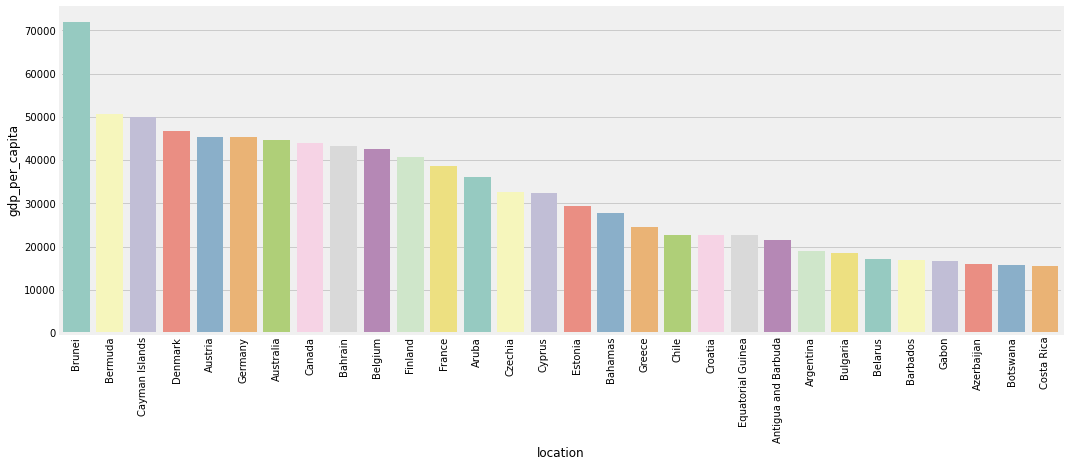

In [269]:
#Ranking the Countries with highest GDP per capita
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='location',y='gdp_per_capita',data=JoinTableFilter.sort_values('gdp_per_capita',ascending=False).head(30), palette='Set3')
plt.xticks(rotation=90)
plt.show()

### Question 6: What is the average life expectancy? What is the mode age of life expectancy?

Anwser: mean = 73, mode are 61.58 and 77.29

0    61.58
1    77.29
dtype: float64


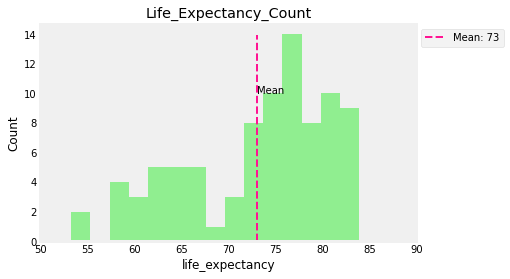

In [270]:
life_med = JoinTableFilter['life_expectancy'].mean()
life_mode = JoinTableFilter['life_expectancy'].mode()
print(life_mode)

plt.hist(data = JoinTableFilter, x = 'life_expectancy', color = "lightgreen", bins=15)
plt.axvline(x=life_med, color='deeppink', ls='--', ymax=0.95, lw=2, label="Mean: {:.0f}".format(life_med))
plt.text(life_med,10,'Mean',rotation=0)
plt.xlabel("life_expectancy")
plt.ylabel("Count")
plt.xlim(50,90)
plt.grid()
plt.title("Life_Expectancy_Count")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left');

### Question 7: What is the correlationship between 'gdp_per_capita' and 'VaccinationsRate'?

Anwser: The below scatterplot investigates the 'gdp_per_capita' is more, and the 'VaccinationsRate' is more, so the 'gdp_per_capita' positively correlates with 'VaccinationsRate'.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='VaccinationsRate'>

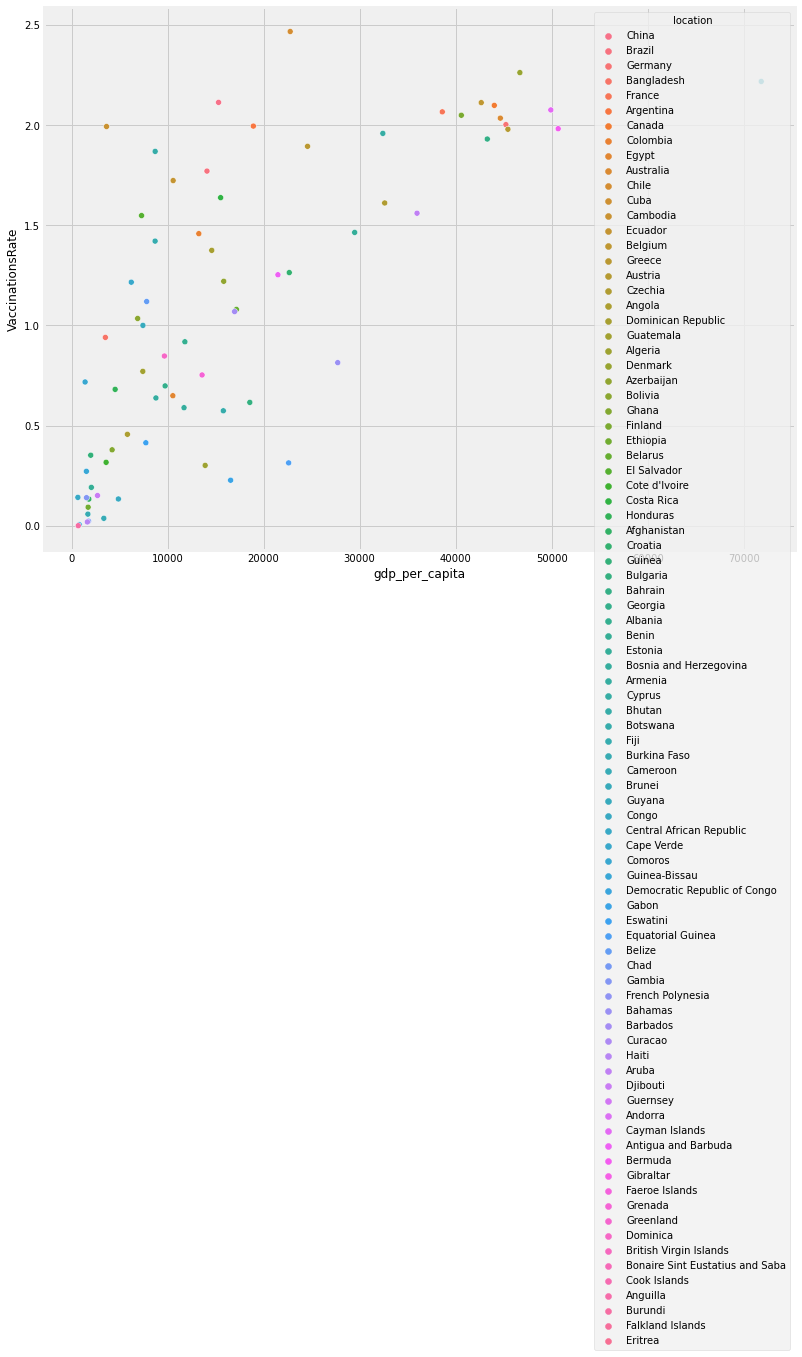

In [271]:
# gdp_per_capita VS VaccinationsRate
plt.figure(figsize=(12,10))
sns.scatterplot(data=JoinTableFilter,x='gdp_per_capita',y='VaccinationsRate',hue='location')

### Plot for Date VS total_cases/Max_Vaccinations/total_deaths

The content of this data is incomplete, so we only analyze the existing content. If we are going to get a more accurate conclusion. We should get more sufficient datasets.
As we can see from the chart below, the total number of confirmed cases in South America remains low. Asia is far ahead of other continents in terms of vaccines. The total death rate in South America is higher than in other continents.

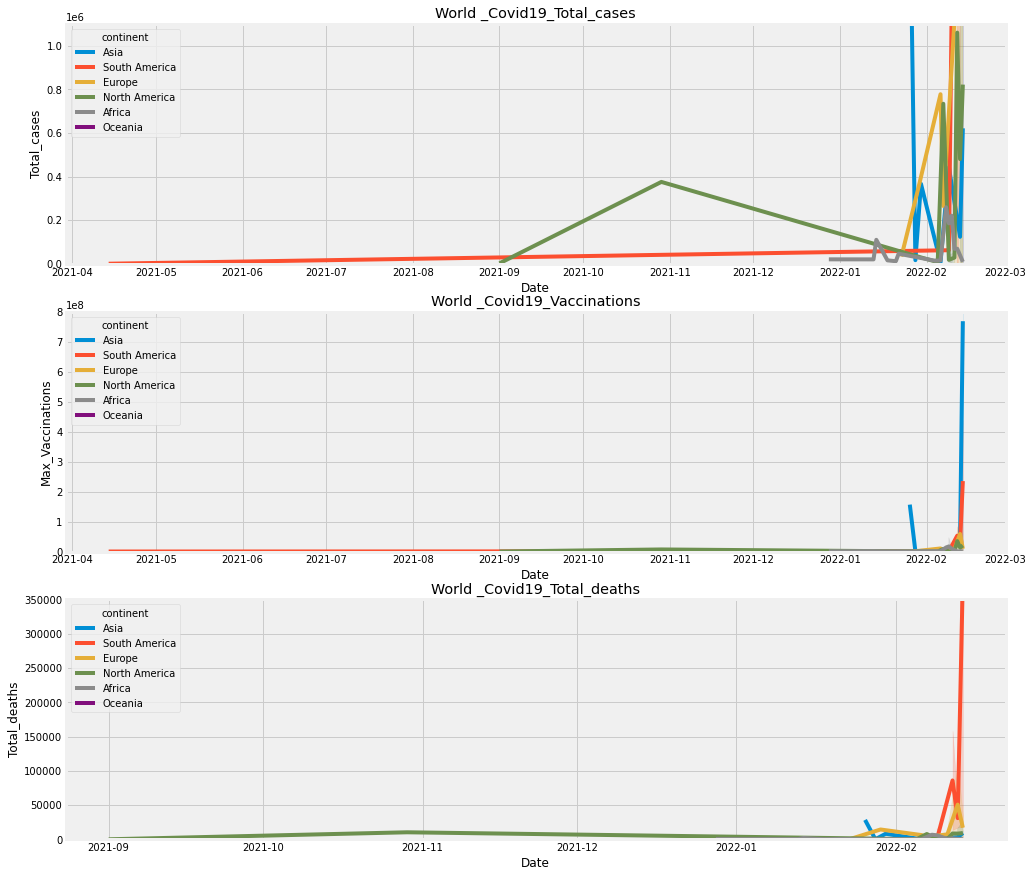

In [335]:
f, ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x = 'date', y="total_cases", hue="continent", data=JoinTableFilter,  ci="sd", ax=ax[0])
sns.lineplot(x = 'date', y="Max_Vaccinations", hue="continent", data=JoinTableFilter,  ci="sd", ax=ax[1])
sns.lineplot(x = 'date', y="total_deaths", hue="continent", data=JoinTableFilter,  ci="sd", ax=ax[2])
 
ax[0].set(title="World _Covid19_Total_cases")
ax[0].set(xlabel="Date", ylabel="Total_cases")
ax[0].set(ylim = (0,1100000))

ax[1].set(title="World _Covid19_Vaccinations")
ax[1].set(xlabel="Date", ylabel="Max_Vaccinations")
ax[1].set(ylim = (0,800000000))

ax[2].set(title="World _Covid19_Total_deaths")
ax[2].set(xlabel="Date", ylabel="Total_deaths")
ax[2].set(ylim = (0,350000))
    
plt.show()